# Gradient Descent
👉 It is an optimization algorithm that's used when training a machine learning model.

👉 It is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until
- it reaches the lowest point of that function
- or, it finished doing the defined number of steps

reference videos: [video 1](https://youtu.be/sDv4f4s2SB8 "StatQuest with Josh Starmer"), [video 2](https://youtu.be/vsWrXfO3wWw "codebasics")

The steps associated with gradient descent:
1. Find the slope of the objective function wrt each parameter/feature. In other words, compute the gradient of the function.
2. Pick a random initial value for the parameters.
3. Update the gradient function by plugging in the parameter values.
4. Calculate the step sizes for each feature as: $ stepSize = gradient * learningRate $
5. Calculate the new parameters as: $ newParams = oldParams - stepSize $
6. repeat 3 to 5 until the gradient is close to 0

### What we learn from high school?
Straight line equation: $ y = mx + b $, where
- `m` is the slope of the line
- `b` is the y intercept

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use("default")

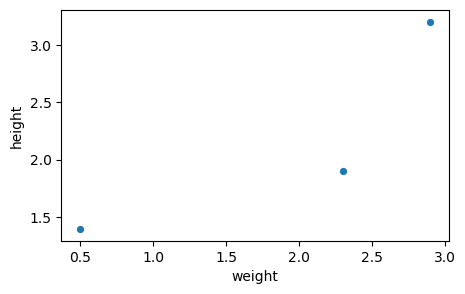

In [34]:
plt.figure(figsize=(5, 3))
height = np.array([1.4, 1.9, 3.2])
weight = np.array([0.5, 2.3, 2.9])
ax = sns.scatterplot(x=weight, y=height)
ax.set(xlabel="weight", ylabel="height");

We have 3 datapoints. Let's try to draw a best fit line from our perspective.

Take $m$ and $b$ value randomly. $ w = 0.65 $, $ b = 0 $

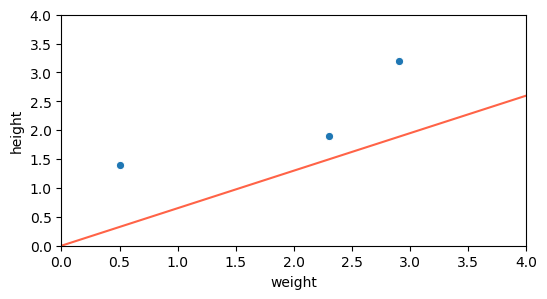

In [30]:
# solpe and y-intercept initialization
w = 0.65
b = 0

#x and y value initialization
x = [0, 0.5, 2.3, 2.9, 4]
y = [(w*val + b) for val in x]

plt.figure(figsize=(6, 3))
ax = sns.scatterplot(x=weight, y=height)
sns.lineplot(x, y, color="tomato")
ax.set(xlabel="weight", ylabel="height", xlim=(0,4), ylim=(0, 4));

## Find actual best fit line

We can get the actual best fit line using `scikit-learn`

In [31]:
from sklearn.linear_model import LinearRegression

In [38]:
regr = LinearRegression()
regr.fit(weight.reshape(-1,1), height.reshape(-1,1))
slope = regr.coef_
yIntercept = regr.intercept_
y_pred = regr.predict(weight.reshape(-1,1))

In [42]:
print(f"m: {slope[0][0]:0.2f}, b: {yIntercept[0]:0.2f}")

m: 0.64, b: 0.95


In [43]:
df = pd.DataFrame()
df["weight"] = weight
df["height"] = height
df["predicted_height"] = y_pred
df

,weight,height,predicted_height
0,0.5,1.4,1.269231
1,2.3,1.9,2.423077
2,2.9,3.2,2.807692


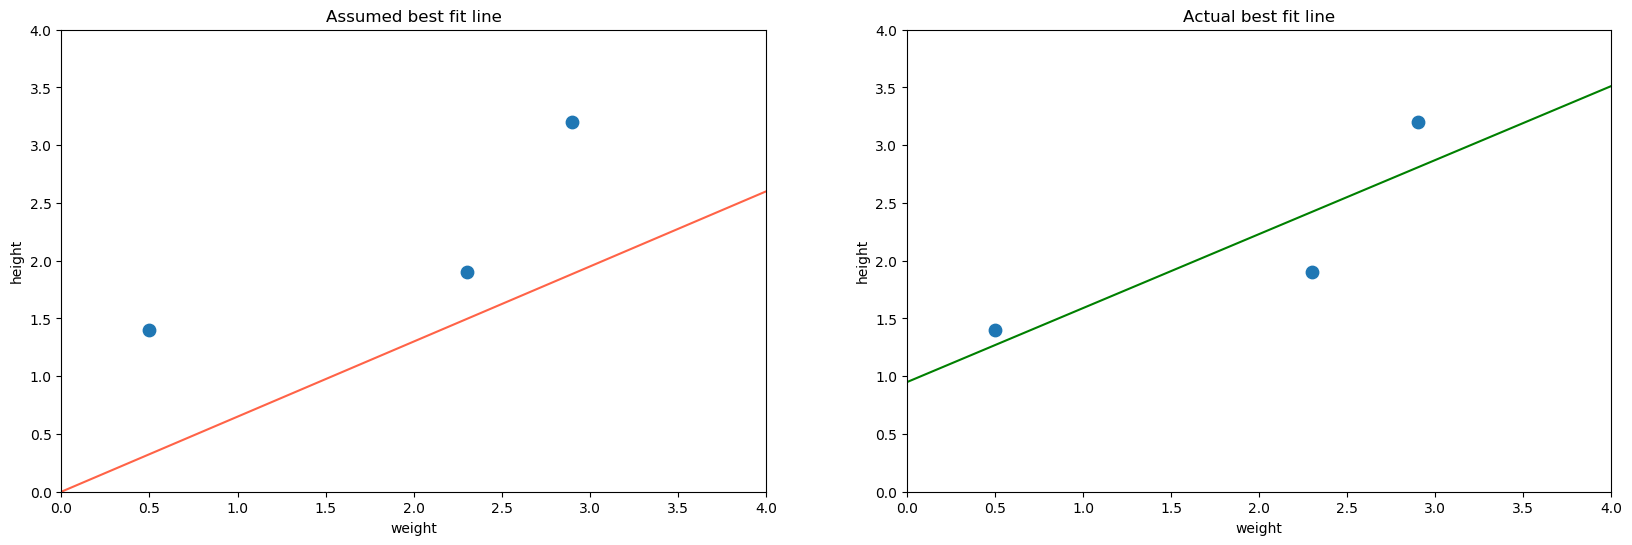

In [55]:
# solpe and y-intercept initialization
w = 0.65
b = 0

#x and y value initialization
x = [0, 0.5, 2.3, 2.9, 4]
y = [(w*val + b) for val in x]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax1.scatter(weight, height, s=80)
ax1.plot(x, y, color="tomato")
ax1.set(xlabel="weight", ylabel="height", xlim=(0,4), ylim=(0, 4))
ax1.set(title="Assumed best fit line")

# solpe and y-intercept initialization
w = slope[0][0]
b = yIntercept[0]

#x and y value initialization
x = [0, 0.5, 2.3, 2.9, 4]
y = [(w*val + b) for val in x]

ax2.scatter(weight, height, s=80)
ax2.plot(x, y, color="green")
ax2.set(xlabel="weight", ylabel="height", xlim=(0,4), ylim=(0, 4))
ax2.set(title="Actual best fit line");

### Make our assumed line a best fit line

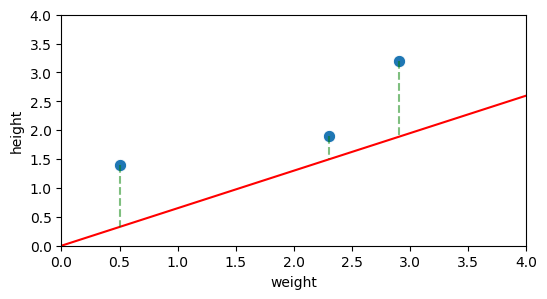

In [80]:
# solpe and y-intercept initialization
w = 0.65
b = 0

#x and y value initialization
x = [0, 0.5, 2.3, 2.9, 4]
y = [(w*val + b) for val in x]

plt.figure(figsize=(6, 3))
ax = sns.scatterplot(x=weight, y=height, s=80)
sns.lineplot(x, y, color="red")
ax.set(xlabel="weight", ylabel="height", xlim=(0,4), ylim=(0, 4))

# draw lines
xx = [0.5, 2.3, 2.9]
y1 = [1.4, 1.9, 3.2]
y2 = [(w*val + b) for val in xx]

for i in range(3):
    value_1 = [xx[i], xx[i]]
    value_2 = [y1[i], y2[i]]
    plt.plot(value_1, value_2, c="green", linestyle='dashed', alpha=0.5);

#### Find the residuals 

$ residual = observedValue - predictedValue $, the green dashed lines in the above graph are the residuals. We need to find the sum of these residuals

$ mse = \frac{1}{n} \sum \limits _{i=1}^n (residual_i)^2 $

Here, n = 3

In [84]:
mse = []

In [85]:
w, b = 0.65, 0

xx = [0.5, 2.3, 2.9]
y1 = [1.4, 1.9, 3.2]
y2 = [(w*val + b) for val in xx]

# find residuals
sum = 0

for i in range(3):
    res = y2[i] - y1[i]
    print(f"residual-{i+1} = {res:0.3f}")
    sum += res**2

mse1 = sum/3
mse.append(mse1)
print(f"mse = {sum/3}")

residual-1 = -1.075
residual-2 = -0.405
residual-3 = -1.315
mse = 1.0162916666666668


### Create a function to find `mse`

In [89]:
def find_mse(b):
    xx = [0.5, 2.3, 2.9]
    y1 = [1.4, 1.9, 3.2]
    y2 = [(w*val + b) for val in xx]

    # find residuals
    sum = 0

    for i in range(3):
        res = y2[i] - y1[i]
        print(f"residual-{i+1} = {res:0.3f}")
        sum += res**2

    error = sum/3
    print(f"mse for b = {b} is {error}")
    return error

### Try for `y-intercept = 0.25`

In [90]:
mse2 = find_mse(0.25)

residual-1 = -0.825
residual-2 = -0.155
residual-3 = -1.065
mse for b = 0.25 is 0.6129583333333336


In [92]:
mse.append(mse2)

### Try for `y-intercept = 0.50`

In [93]:
mse3 = find_mse(0.5)

residual-1 = -0.575
residual-2 = 0.095
residual-3 = -0.815
mse for b = 0.5 is 0.3346250000000002


In [94]:
mse.append(mse3)

### Try for `y-intercept = 0.75`

In [95]:
mse4 = find_mse(0.75)

residual-1 = -0.325
residual-2 = 0.345
residual-3 = -0.565
mse for b = 0.75 is 0.18129166666666685


In [96]:
mse.append(mse4)

### Try for `y-intercept = 1.00`

In [97]:
mse5 = find_mse(1)

residual-1 = -0.075
residual-2 = 0.595
residual-3 = -0.315
mse for b = 1 is 0.1529583333333335


In [98]:
mse.append(mse5)

### Try for `y-intercept = 1.25`

In [99]:
mse6 = find_mse(1.25)

residual-1 = 0.175
residual-2 = 0.845
residual-3 = -0.065
mse for b = 1.25 is 0.24962500000000012


In [100]:
mse.append(mse6)

### Try for `y-intercept = 1.50`

In [101]:
mse7 = find_mse(1.5)

residual-1 = 0.425
residual-2 = 1.095
residual-3 = 0.185
mse for b = 1.5 is 0.47129166666666683


In [102]:
mse.append(mse7)

#### observation

from `mse6` the value of mse started increasing, so we found our desired mse in the previous value = `mse5`

### plot the `mse` values

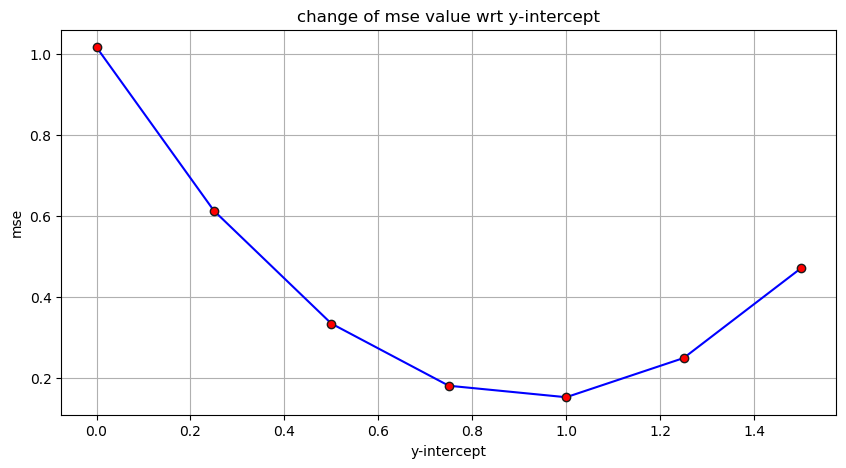

In [129]:
value_b = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5]

plt.figure(figsize=(10, 5))
plt.plot(value_b, mse, "o-", c='blue', markerfacecolor='red', markeredgecolor='k')
plt.xlabel("y-intercept")
plt.ylabel("mse")
plt.title("change of mse value wrt y-intercept")
plt.grid();

So we found the lowest point, when `y0intercept = 1.0` which is close to `0.95` that we got from `sklearn`'s `LiearRegression` model.

However, there is a possibility that this point is not the actual minimum point. Because we didn't calculate for values between `0.75 & 1.0` and values between `1.0 & 1.25`

### Is `Gradient Descent` good?

As se have to calculate for so many values, obviously it'll take more time for calculation.
- We assumed `w = 0.65` at the begining, but we also have to find this value using gradient descent
- We have to calculate for every relevant feature

#### Good news! !!

Gradient descend doesn't take value uniformly. It does less calculation at the points that are far from the optimal value by taking `big steps` and increase calculation when getting closer to the optimal solution by taking `baby steps`